# **Analysis 2: Comparing tract-averaged means**

*Date:* 27 May 2025

*Description:* This notebook compares tract-averageed means for the Travelling Heads (TRAMFIX) dataset.

There are 4 key analyses run here:
1. Comparing tract-averaged means for FBA metrics (using site-specific pipeline)
2. Comparing tract-averaged means for FBA metrics (using group pipeline)
3. Comparing tract-averaged means for DTI metrics for comparison (using site-specific pipeline)
4. Comparing tract-averaged means for DTI metrics for comparison (using group pipeline)

## **Set up: import & organise data**

### Step 1: Set up input & output dirs

In [1]:
import pandas as pd
import os

## Input dir containing data
input_dir = '/Users/remika/Library/CloudStorage/OneDrive-TheUniversityofMelbourne/RESEARCH_PROJECTS/DECRA/TravellingHeads/Data/Analysis2_tractmeans'

## Output dir for plots
output_dir = '/Users/remika/Library/CloudStorage/OneDrive-TheUniversityofMelbourne/RESEARCH_PROJECTS/DECRA/TravellingHeads/Data/plots'

/Users/remika/opt/anaconda3/lib/python3.9/site-packages/pandas/core/computation/expressions.py:21: UserWarning: Pandas requires version '2.8.4' or newer of 'numexpr' (version '2.8.3' currently installed).
  from pandas.core.computation.check import NUMEXPR_INSTALLED
/Users/remika/opt/anaconda3/lib/python3.9/site-packages/pandas/core/arrays/masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


### Step 2: Import data

In [2]:
## FD (DF1)
input_dir = '/Users/remika/Library/CloudStorage/OneDrive-TheUniversityofMelbourne/RESEARCH_PROJECTS/DECRA/TravellingHeads/Data/Analysis2_tractmeans'
tract_fd_df1 = os.path.join(input_dir, 'FD_tractmeans_RM.csv')
tract_df1 = pd.read_csv(tract_fd_df1, sep=',')

In [4]:
## FC (DF2)
tract_fc_df2 = os.path.join(input_dir, 'FC_tractmeans_RM.csv')
tract_df2 = pd.read_csv(tract_fc_df2, sep=',')

In [6]:
## FDC (DF3)
tract_fdc_df3 = os.path.join(input_dir, 'FDC_tractmeans_RM.csv')
tract_df3 = pd.read_csv(tract_fdc_df3, sep=',')

In [40]:
## FA (DF_FA)
tract_fa_dir = os.path.join(input_dir, 'FA_tractmeans_poptemp1.csv')
tract_fa_df = pd.read_csv(tract_fa_dir, sep=',')

In [41]:
## ADC (DF_ADC)
tract_adc_dir = os.path.join(input_dir, 'ADC_tractmeans_poptemp1.csv')
tract_adc_df = pd.read_csv(tract_adc_dir, sep=',')

### Step 3: Separate site & ID

In [7]:
# Separate site & ID
tract_df1[['ID', 'Site']] = tract_df1['ID'].str.split('_', expand=True)
tract_df2[['ID', 'Site']] = tract_df2['ID'].str.split('_', expand=True)
tract_df3[['ID', 'Site']] = tract_df3['ID'].str.split('_', expand=True)

In [ ]:
# DTI measures
tract_fa_df[['ID', 'Site']] = tract_fa_df['ID'].str.split('_', expand=True)
tract_adc_df[['ID', 'Site']] = tract_adc_df['ID'].str.split('_', expand=True)

### Step 4: Convert to long

In [8]:
# DF1
tract_df1_long = tract_df1.melt(id_vars=['ID', 'Site'],
                                  var_name="Tract",
                                  value_name='FD')

In [9]:
# DF2
tract_df2_long = tract_df2.melt(id_vars=['ID', 'Site'],
                                  var_name="Tract",
                                  value_name='FC')

In [10]:
# DF3
tract_df3_long = tract_df3.melt(id_vars=['ID', 'Site'],
                                  var_name="Tract",
                                  value_name='FDC')

In [54]:
# DF FA
tract_fa_df_long = tract_fa_df.melt(id_vars=['ID', 'Site'],
                                  var_name="Tract",
                                  value_name='FA')

In [43]:
# DF ADC
tract_adc_df_long = tract_adc_df.melt(id_vars=['ID', 'Site'],
                                  var_name="Tract",
                                  value_name='MD')

# **FBA metrics (site-specific pipeline)**

## **Tract-averaged FD**

### Step 1: Compute means & CV

In [11]:
cv_results_df1 = []
for tract in tract_df1_long['Tract'].unique():
    subset = tract_df1_long[tract_df1_long['Tract'] == tract]
    mean = subset['FD'].mean()
    std = subset['FD'].std() 
    cv = std/mean*100
    cv_results_df1.append({'Tract': tract, 'mean': mean, 'std': std, 'CV': cv})

# Convert to DataFrame
cv_df1 = pd.DataFrame(cv_results_df1)

In [12]:
print(cv_df1)

           Tract      mean       std        CV
0        AF_left  0.354545  0.013915  3.924708
1       AF_right  0.354725  0.014530  4.096090
2       ATR_left  0.325250  0.012632  3.883849
3      ATR_right  0.330127  0.016145  4.890427
4             CA  0.341722  0.031677  9.269817
..           ...       ...       ...       ...
67  T_PREF_right  0.380896  0.017576  4.614259
68   T_PREM_left  0.371895  0.017132  4.606777
69  T_PREM_right  0.404963  0.017958  4.434360
70       UF_left  0.346057  0.017366  5.018251
71      UF_right  0.335296  0.018743  5.589980

[72 rows x 4 columns]


### Step 2: Compute ICC

In [21]:
# Compute ICC(3,1) for each tract

import pingouin as pg

icc_results_df1 = []
for tract in tract_df1_long['Tract'].unique():
    subset = tract_df1_long[tract_df1_long['Tract'] == tract]  
    icc = pg.intraclass_corr(data=subset, targets='ID', raters='Site', ratings='FD')
    icc_2_1 = icc[icc['Type'] == 'ICC2']['ICC'].values[0] 
    icc_3_1 = icc[icc['Type'] == 'ICC3']['ICC'].values[0]  # Extract ICC(3,1)
    icc_3_pval = icc[icc['Type'] == 'ICC3']['pval'].values[0] # extract pval for ICC3
    icc_results_df1.append({'Tract': tract, 'ICC(2,1)': icc_2_1, 'ICC(3,1)': icc_3_1, 'pval': icc_3_pval})

# Convert to DataFrame
icc_df1 = pd.DataFrame(icc_results_df1)

In [14]:
print(icc_df1)

           Tract   ICC_3_1          pval
0        AF_left  0.961612  1.907921e-18
1       AF_right  0.965662  4.279073e-19
2       ATR_left  0.865124  3.460696e-11
3      ATR_right  0.958204  5.964297e-18
4             CA  0.964435  6.852539e-19
..           ...       ...           ...
67  T_PREF_right  0.973446  1.356905e-20
68   T_PREM_left  0.938860  9.646569e-16
69  T_PREM_right  0.942172  4.586912e-16
70       UF_left  0.930183  5.659781e-15
71      UF_right  0.916422  6.196180e-14

[72 rows x 3 columns]


### Step 3: Combine results

In [22]:
results_df1 = pd.merge(cv_df1, icc_df1, on="Tract")
results_df1['Tract'] = results_df1['Tract'].str.replace("_", " ")

In [17]:
results_df1['CV'].agg(['min', 'max'])

min    2.286235
max    9.269817
Name: CV, dtype: float64

In [ ]:
results_df1['ICC(3,1)'].agg(['min', 'max'])

min    0.652389
max    0.980366
Name: ICC_3_1, dtype: float64

In [39]:
results_df1['ICC(2,1)'].agg(['min', 'max'])

min    0.538302
max    0.963352
Name: ICC(2,1), dtype: float64

### Step 4: Plot ICC

/var/folders/g8/w52c85dx1fsgxg5681hppls80000gn/T/ipykernel_82075/777676933.py:13: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  cmap = cm.get_cmap("Spectral")
/var/folders/g8/w52c85dx1fsgxg5681hppls80000gn/T/ipykernel_82075/777676933.py:25: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  bars = sns.barplot(
/var/folders/g8/w52c85dx1fsgxg5681hppls80000gn/T/ipykernel_82075/777676933.py:45: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


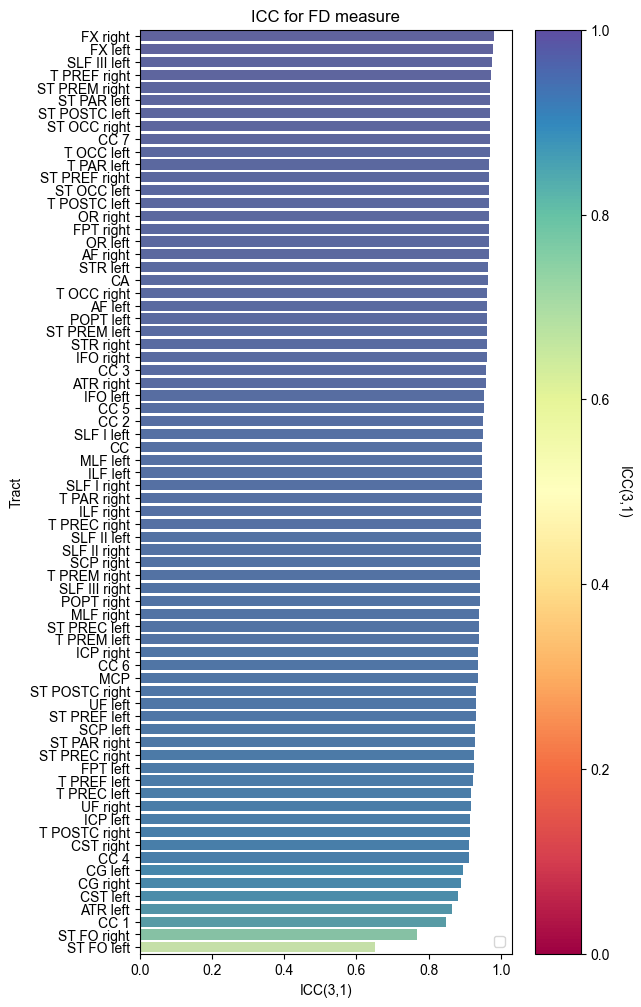

In [80]:
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.cm as cm
import matplotlib.colors as mcolors

# Sort by ICC values (low to high)
icc_df1_sorted = results_df1.sort_values(by="ICC(3,1)", ascending=False)

plt.rcParams['font.family'] = 'Arial'

# manual colour mapping (range from 0 to 1 for ICC)
norm = mcolors.Normalize(vmin=0, vmax=1)
cmap = cm.get_cmap("Spectral")
# or using rocket without mapping
# norm = mcolors.Normalize(vmin=results_df1['ICC_3_1'].min(), vmax=results_df1['ICC_3_1'].max())
# cmap = cm.get_cmap("rocket")
colours = [cmap(norm(val)) for val in icc_df1_sorted['ICC(3,1)']]

# # Plot
# plt.figure(figsize=(6, 12))
# sns.barplot(data=icc_df1_sorted, x="ICC_3_1", y="Tract", palette=colours)

# plot
fig, ax = plt.subplots(figsize=(6,12))
bars = sns.barplot(
    data=icc_df1_sorted,
    y="Tract",
    x="ICC(3,1)",
    palette=colours,
    ax=ax
)
# Add vertical colorbar
sm = cm.ScalarMappable(cmap=cmap, norm=norm)
sm.set_array([])  # Required for matplotlib < 3.1
cbar = fig.colorbar(sm, ax=ax, orientation="vertical")
cbar.set_label("ICC(3,1)", rotation=270, labelpad=15)

# Format plot
#plt.xticks(rotation=90, fontsize=10)  # Rotate measure names for visibility
plt.ylabel("Tract")
plt.xlabel("ICC(3,1)")
plt.title("ICC for FD measure")
#plt.axhline(y=0.75, color='g', linestyle='--', label="Excellent Agreement (0.75)")
#plt.axhline(y=0.40, color='r', linestyle='--', label="Poor Agreement (0.40)")
plt.legend()

##output_plt = os.path.join(output_dir, "icc_plot_fd.svg")

#plt.savefig(os.path.join(output_dir, "icc_plot_fd_template1.svg"), format="svg", bbox_inches="tight")

plt.show()

In [81]:
icc_df1_sorted['hexcode'] = icc_df1_sorted['ICC(3,1)'].apply(lambda val: mcolors.to_hex(cmap(norm(val))))

## **Tract-averaged FC**

### Step 1: Compute means & CV

In [23]:
cv_results_df2 = []
for tract in tract_df2_long['Tract'].unique():
    subset = tract_df2_long[tract_df2_long['Tract'] == tract]
    mean = subset['FC'].mean()
    std = subset['FC'].std() 
    cv = std/mean*100
    cv_results_df2.append({'Tract': tract, 'mean': mean, 'std': std, 'CV': cv})

# Convert to DataFrame
cv_df2 = pd.DataFrame(cv_results_df2)

### Step 2: Compute ICC

In [24]:
icc_results_df2 = []
for tract in tract_df2_long['Tract'].unique():
    subset = tract_df2_long[tract_df2_long['Tract'] == tract]  
    icc = pg.intraclass_corr(data=subset, targets='ID', raters='Site', ratings='FC')
    icc_2_1 = icc[icc['Type'] == 'ICC2']['ICC'].values[0] 
    icc_3_1 = icc[icc['Type'] == 'ICC3']['ICC'].values[0]  # Extract ICC(3,1)
    icc_3_pval = icc[icc['Type'] == 'ICC3']['pval'].values[0] # extract pval for ICC3
    icc_results_df2.append({'Tract': tract, 'ICC(2,1)': icc_2_1, 'ICC(3,1)': icc_3_1, 'pval': icc_3_pval})

# Convert to DataFrame
icc_df2 = pd.DataFrame(icc_results_df2)

### Step 3: Combine results

In [25]:
results_df2 = pd.merge(cv_df2, icc_df2, on="Tract")
results_df2['Tract'] = results_df2['Tract'].str.replace("_", " ")

In [26]:
results_df2['CV'].agg(['min', 'max'])

min     5.310129
max    10.907569
Name: CV, dtype: float64

In [28]:
results_df2['ICC(3,1)'].agg(['min', 'max'])

min    0.965792
max    0.998299
Name: ICC(3,1), dtype: float64

## **Tract-averaged FDC**

### Step 1: Compute means & CV

In [32]:
cv_results_df3 = []
for tract in tract_df3_long['Tract'].unique():
    subset = tract_df3_long[tract_df3_long['Tract'] == tract]
    mean = subset['FDC'].mean()
    std = subset['FDC'].std() 
    cv = std/mean*100
    cv_results_df3.append({'Tract': tract, 'mean': mean, 'std': std, 'CV': cv})

# Convert to DataFrame
cv_df3 = pd.DataFrame(cv_results_df3)

### Step 2: Compute ICC

In [34]:
icc_results_df3 = []
for tract in tract_df3_long['Tract'].unique():
    subset = tract_df3_long[tract_df3_long['Tract'] == tract]  
    icc = pg.intraclass_corr(data=subset, targets='ID', raters='Site', ratings='FDC')
    icc_2_1 = icc[icc['Type'] == 'ICC2']['ICC'].values[0] 
    icc_3_1 = icc[icc['Type'] == 'ICC3']['ICC'].values[0]  # Extract ICC(3,1)
    icc_3_pval = icc[icc['Type'] == 'ICC3']['pval'].values[0] # extract pval for ICC3
    icc_results_df3.append({'Tract': tract, 'ICC(2,1)': icc_2_1, 'ICC(3,1)': icc_3_1, 'pval': icc_3_pval})

# Convert to DataFrame
icc_df3 = pd.DataFrame(icc_results_df3)

### Step 3: Combine results

In [35]:
results_df3 = pd.merge(cv_df3, icc_df3, on="Tract")
results_df3['Tract'] = results_df3['Tract'].str.replace("_", " ")

In [36]:
results_df3['CV'].agg(['min', 'max'])

min     6.409881
max    18.118528
Name: CV, dtype: float64

In [38]:
results_df3['ICC(3,1)'].agg(['min', 'max'])

min    0.915776
max    0.994503
Name: ICC(3,1), dtype: float64

# **FBA metrics (group pipeline)**

# **DTI metrics (site-specific pipeline)**

## **Tract-averaged FA**

### Step 1: Compute means & CV

In [53]:
cv_results_fa_df = []
for tract in tract_fa_df_long['Tract'].unique():
    subset = tract_fa_df_long[tract_fa_df_long['Tract'] == tract]
    mean = subset['FA'].mean()
    std = subset['FA'].std() 
    cv = std/mean*100
    cv_results_fa_df.append({'Tract': tract, 'mean': mean, 'std': std, 'CV': cv})

# Convert to DataFrame
cv_fa_df = pd.DataFrame(cv_results_fa_df)

In [46]:
print(cv_fa_df)

           Tract      mean       std        CV
0        AF_left  0.347130  0.011431  3.292962
1       AF_right  0.354095  0.011700  3.304097
2       ATR_left  0.320152  0.014944  4.667722
3      ATR_right  0.324123  0.014454  4.459421
4             CA  0.339830  0.024340  7.162384
..           ...       ...       ...       ...
67  T_PREF_right  0.348202  0.013846  3.976367
68   T_PREM_left  0.353499  0.017711  5.010303
69  T_PREM_right  0.370795  0.019045  5.136246
70       UF_left  0.325854  0.014847  4.556250
71      UF_right  0.319809  0.013888  4.342577

[72 rows x 4 columns]


### Step 2: Compute ICC

In [65]:
# Compute ICC(3,1) for each tract

import pingouin as pg

icc_results_fa_df = []
for tract in tract_fa_df_long['Tract'].unique():
    subset = tract_fa_df_long[tract_fa_df_long['Tract'] == tract]  
    icc = pg.intraclass_corr(data=subset, targets='ID', raters='Site', ratings='FA')
    icc_2_1 = icc[icc['Type'] == 'ICC2']['ICC'].values[0] 
    icc_3_1 = icc[icc['Type'] == 'ICC3']['ICC'].values[0]  # Extract ICC(3,1)
    icc_3_pval = icc[icc['Type'] == 'ICC3']['pval'].values[0] # extract pval for ICC3
    icc_results_fa_df.append({'Tract': tract, 'ICC(2,1)': icc_2_1, 'ICC(3,1)': icc_3_1, 'pval': icc_3_pval})

# Convert to DataFrame
icc_fa_df = pd.DataFrame(icc_results_fa_df)

### Step 3: Combine results

In [66]:
results_fa_df = pd.merge(cv_fa_df, icc_fa_df, on="Tract")
results_fa_df['Tract'] = results_fa_df['Tract'].str.replace("_", " ")

In [63]:
results_fa_df['CV'].agg(['min', 'max'])

min    1.533739
max    7.162384
Name: CV, dtype: float64

In [64]:
results_fa_df['ICC(3,1)'].agg(['min', 'max'])

min    0.486360
max    0.963314
Name: ICC(3,1), dtype: float64

### Step 4: Plot results

/var/folders/g8/w52c85dx1fsgxg5681hppls80000gn/T/ipykernel_82075/1241793486.py:13: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  cmap = cm.get_cmap("Spectral")
/var/folders/g8/w52c85dx1fsgxg5681hppls80000gn/T/ipykernel_82075/1241793486.py:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  bars = sns.barplot(
/var/folders/g8/w52c85dx1fsgxg5681hppls80000gn/T/ipykernel_82075/1241793486.py:42: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


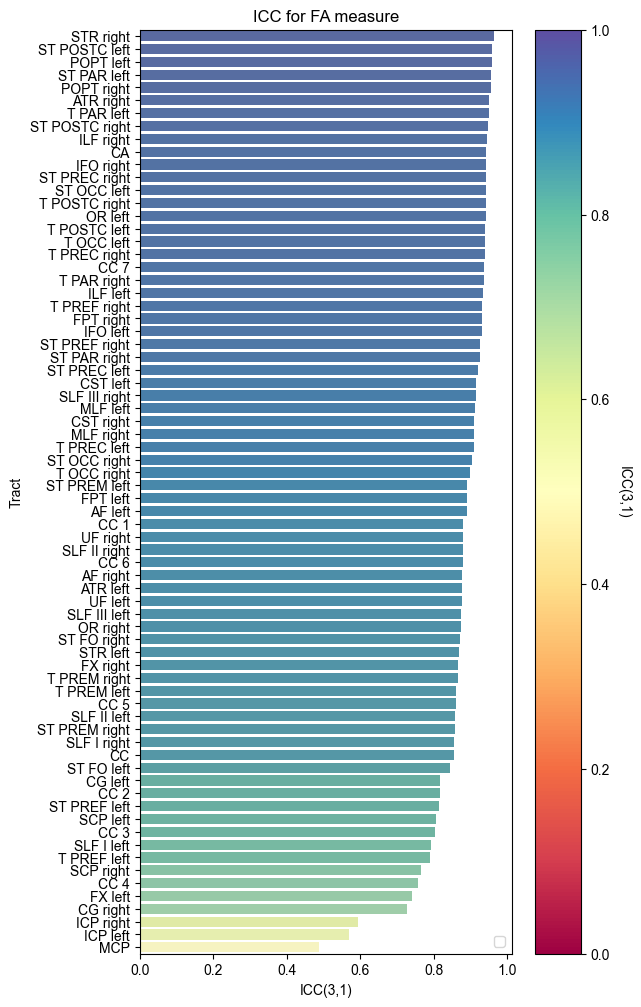

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.cm as cm
import matplotlib.colors as mcolors

# Sort by ICC values (low to high)
icc_fa_sorted = results_fa_df.sort_values(by="ICC(3,1)", ascending=False)

plt.rcParams['font.family'] = 'Arial'

# manual colour mapping (range from 0 to 1 for ICC)
norm = mcolors.Normalize(vmin=0, vmax=1)
cmap = cm.get_cmap("Spectral")
colours = [cmap(norm(val)) for val in icc_fa_sorted['ICC(3,1)']]

# # Plot
# plt.figure(figsize=(6, 12))
# sns.barplot(data=icc_fa_sorted, x="ICC_3_1", y="Tract", palette=colours)

# plot
fig, ax = plt.subplots(figsize=(6,12))
bars = sns.barplot(
    data=icc_fa_sorted,
    y="Tract",
    x="ICC(3,1)",
    palette=colours,
    ax=ax
)
# Add vertical colorbar
sm = cm.ScalarMappable(cmap=cmap, norm=norm)
sm.set_array([])  # Required for matplotlib < 3.1
cbar = fig.colorbar(sm, ax=ax, orientation="vertical")
cbar.set_label("ICC(3,1)", rotation=270, labelpad=15)

# Format plot
#plt.xticks(rotation=90, fontsize=10)  # rotate tract names
plt.ylabel("Tract")
plt.xlabel("ICC(3,1)")
plt.title("ICC for FA measure")
plt.legend()

##output_plt = os.path.join(output_dir, "icc_plot_fd.svg")

plt.savefig(os.path.join(output_dir, "icc_plot_fa_template1.svg"), format="svg", bbox_inches="tight")

plt.show()

In [78]:
icc_fa_sorted['hexcode'] = icc_fa_sorted['ICC(3,1)'].apply(lambda val: mcolors.to_hex(cmap(norm(val))))

## **Tract-averaged ADC**

### Step 1: Compute means & CV

In [71]:
cv_results_adc_df = []
for tract in tract_adc_df_long['Tract'].unique():
    subset = tract_adc_df_long[tract_adc_df_long['Tract'] == tract]
    mean = subset['MD'].mean()
    std = subset['MD'].std() 
    cv = std/mean*100
    cv_results_adc_df.append({'Tract': tract, 'mean': mean, 'std': std, 'CV': cv})

# Convert to DataFrame
cv_adc_df = pd.DataFrame(cv_results_adc_df)

### Step 2: Compute ICC

In [72]:
# Compute ICC(3,1) for each tract

import pingouin as pg

icc_results_adc_df = []
for tract in tract_adc_df_long['Tract'].unique():
    subset = tract_adc_df_long[tract_adc_df_long['Tract'] == tract]  
    icc = pg.intraclass_corr(data=subset, targets='ID', raters='Site', ratings='MD')
    icc_2_1 = icc[icc['Type'] == 'ICC2']['ICC'].values[0] 
    icc_3_1 = icc[icc['Type'] == 'ICC3']['ICC'].values[0]  # Extract ICC(3,1)
    icc_3_pval = icc[icc['Type'] == 'ICC3']['pval'].values[0] # extract pval for ICC3
    icc_results_adc_df.append({'Tract': tract, 'ICC(2,1)': icc_2_1, 'ICC(3,1)': icc_3_1, 'pval': icc_3_pval})

# Convert to DataFrame
icc_adc_df = pd.DataFrame(icc_results_adc_df)

### Step 3: Combine results

In [73]:
results_adc_df = pd.merge(cv_adc_df, icc_adc_df, on="Tract")
results_adc_df['Tract'] = results_adc_df['Tract'].str.replace("_", " ")

In [74]:
results_adc_df['CV'].agg(['min', 'max'])

min    1.436986
max    9.556331
Name: CV, dtype: float64

In [75]:
results_adc_df['ICC(3,1)'].agg(['min', 'max'])

min    0.464929
max    0.969186
Name: ICC(3,1), dtype: float64

# **DTI metrics (group pipeline)**